# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

The following models and techniques are implemented as part of this exercise,
- Logistic Regression
- SVM
- XGB
- Random Forest
- PCA
- HPT with Hyper Opt and Grid search
- SMOTE


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as stats
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,auc
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale


# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Understanding the Data 

Lets understand the column descriptions by looking at the data dict

In [0]:
data_dict = pd.read_csv("/Workspace/Users/pradeep.ravi@databricks.com/ml/telecom_churn/data_dictionary.csv")
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


Data Pre-Processing is applied in parallel for the test data in different Dataframe , so that we dont need to handle it seperately 

In [0]:
churn_train=pd.read_csv('/Workspace/Users/pradeep.ravi@databricks.com/ml/telecom_churn/train.csv')
churn_test=pd.read_csv('/Workspace/Users/pradeep.ravi@databricks.com/ml/telecom_churn/test.csv')
churn_train.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [0]:
churn_test.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.00,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.00,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,2

In [0]:
# Checking the shape of the dataset
churn_train.shape


(69999, 172)

In [0]:
churn_test.shape

(30000, 171)

In [0]:
churn_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [0]:
churn_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

# Missing Values Treatment

Its evident from the describe, some of the columns have only one unique value , having one unique value for all the rows is a constant which wouldnt explain the variance of the data. Hence we can find those columns and remove them

In [0]:
# Find the columns which has only one unique values 
remove_list = []
for i in churn_train.columns:
    if churn_train[i].nunique()==1:
        remove_list.append(i)
print('columns which has only one unique values are : ')
remove_list    

columns which has only one unique values are : 


['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [0]:
churn_train=churn_train.drop(remove_list,axis=1)
churn_test=churn_test.drop(remove_list,axis=1)
churn_train.shape

(69999, 159)

In [0]:
churn_test.shape

(30000, 158)

In [0]:
percent_missing = churn_train.isnull().sum() * 100 / len(churn_train)
print(percent_missing)

id                           0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_mou_6             3.954342
loc_og_t2c_m

The missingness in the dataset can be a feature itself, the variables related to recharge the minimum values can be zero which means no recharge was done. Lets impute zero values to all the columns related to recharge 

In [0]:
reacharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

churn_train[reacharge_cols] = churn_train[reacharge_cols].apply(lambda x: x.fillna(0))
churn_test[reacharge_cols] = churn_test[reacharge_cols].apply(lambda x: x.fillna(0))
churn_train[reacharge_cols].isnull().sum()*100/churn_train.shape[1]


total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [0]:
churn_train[reacharge_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,48.395787,51.415168,51.782975,31.748339,32.260075,32.986614
std,1.762010,1.943193,1.973434,126.923180,133.246541,131.291162,77.519536,78.069163,78.808337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,17.000000,23.000000,8.000000,14.000000,17.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


Drop the duplicates 

In [0]:
churn_train.drop_duplicates(subset=None, inplace=True)
churn_test.drop_duplicates(subset=None, inplace=True)
print(churn_train.shape)
print(churn_test.shape)


(69999, 159)
(30000, 158)


The ID columns and Date columns are not required for the analysis , we can remove them by dropping 

In [0]:
churn_test_id=churn_test['id']
churn_test.set_index('id', inplace=True)


In [0]:
remove_cols=['id',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

churn_train = churn_train.drop(remove_cols, axis=1)
remove_cols.remove('id')
churn_test = churn_test.drop(remove_cols, axis=1)
print(churn_train.shape)
print(churn_test.shape)

(69999, 152)
(30000, 151)


In [0]:
categories =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]
for i in categories:
    print(churn_train[i].value_counts())

# Imputinng '-1' for thr missing values in categorical columns
churn_train[categories] = churn_train[categories].apply(lambda x: x.fillna(-1))  
churn_test[categories] = churn_test[categories].apply(lambda x: x.fillna(-1))    

print(churn_train[categories].isnull().sum()*100/churn_train.shape[0])


0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64
0.0    17435
1.0      430
Name: night_pck_user_7, dtype: int64
0.0    18030
1.0      387
Name: night_pck_user_8, dtype: int64
1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64
1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64
1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


For a wider dataset where we have more columns, manually inspecting and removing the columns with more missing values is unrealistic, the programatic approch is to set the tolreance and remove the missing values based on the tolerance. For example ,Lets say 30% is the tolreance used for this dataset which means the column has 70% null values , the column with 70 % null values will be removed and considered as invalid feature

In [0]:

def removecols_missingvalues(df,tolerance=0.3):
    """
    The function takes Dataframe as input
    Based the given tolreance of missing values in the given column , the columns are removed
    Default tolerance is 30% which means columns which has 70% missing values will be dropped
    returns new dataframe with dropped columns
    """
    l = len(df)
    dropcols = []
    df2 = df[[column for column in df if df[column].count() / l >= tolerance]]
    
    print("List of dropped columns:", end=" ")
    for c in df.columns:
        if c not in df2.columns:
            dropcols.append(c)
            print(f"column {c} is discarded because it has only {((df[c].count())/l)*100} % valid values!")
    print('\n')
    
    df = df2
    return df

churn_train = removecols_missingvalues(churn_train)

List of dropped columns: column count_rech_2g_6 is discarded because it has only 25.097501392877042 % valid values!
column count_rech_2g_7 is discarded because it has only 25.521793168473835 % valid values!
column count_rech_2g_8 is discarded because it has only 26.31037586251232 % valid values!
column count_rech_3g_6 is discarded because it has only 25.097501392877042 % valid values!
column count_rech_3g_7 is discarded because it has only 25.521793168473835 % valid values!
column count_rech_3g_8 is discarded because it has only 26.31037586251232 % valid values!
column arpu_3g_6 is discarded because it has only 25.097501392877042 % valid values!
column arpu_3g_7 is discarded because it has only 25.521793168473835 % valid values!
column arpu_3g_8 is discarded because it has only 26.31037586251232 % valid values!
column arpu_2g_6 is discarded because it has only 25.097501392877042 % valid values!
column arpu_2g_7 is discarded because it has only 25.521793168473835 % valid values!
column 

In [0]:
churn_test = churn_test.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1)

Lets impute the median values for the numerical columns 

In [0]:
numerical_features = [
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'churn_probability']

churn_train[numerical_features] = churn_train[numerical_features].apply(lambda x: x.fillna(x.median()))
numerical_features.remove('churn_probability')
churn_test[numerical_features] = churn_test[numerical_features].apply(lambda x: x.fillna(x.median()))



In [0]:
churn_train.isnull().sum()*100/churn_train.shape[0]

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

Derive the column to find Total data recharge value for June and July which would help us to find the churn 

In [0]:
#Focus is only the high value customers
# Total Data Recharge Amt = total_rech_data_6 * av_rech_amt_data_6

churn_train['total_data_rech_6'] = churn_train.total_rech_data_6 * churn_train.av_rech_amt_data_6
churn_train['total_data_rech_7'] = churn_train.total_rech_data_7 * churn_train.av_rech_amt_data_7

#Applying the same for test dataset
churn_test['total_data_rech_6'] = churn_test.total_rech_data_6 * churn_test.av_rech_amt_data_6
churn_test['total_data_rech_7'] = churn_test.total_rech_data_7 * churn_test.av_rech_amt_data_7

#  Total recharge amount = call recharge amount + data recharge amount
churn_train['amt_data_6'] = churn_train.total_rech_amt_6 + churn_train.total_data_rech_6
churn_train['amt_data_7'] = churn_train.total_rech_amt_7 + churn_train.total_data_rech_7

# calculate average recharge done by customer in June and July
churn_train['av_amt_data_6_7'] = (churn_train.amt_data_6 + churn_train.amt_data_7)/2

#Applying the above calc for test 
#  Total recharge amount = call recharge amount + data recharge amount
churn_test['amt_data_6'] = churn_test.total_rech_amt_6 + churn_test.total_data_rech_6
churn_test['amt_data_7'] = churn_test.total_rech_amt_7 + churn_test.total_data_rech_7

# calculate average recharge done by customer in June and July
churn_test['av_amt_data_6_7'] = (churn_test.amt_data_6 + churn_test.amt_data_7)/2

Lets Understand the distribution of Average recharge amount for June and July 

In [0]:
# Define the desired percentiles
percentiles = [25, 50, 75, 80]

# Calculate percentiles using numpy.percentile
percentile_values = np.percentile(churn_train['av_amt_data_6_7'], percentiles)

print(f" Percentiles {percentiles}: {percentile_values}")


 Percentiles [25, 50, 75, 80]: [128.  275.5 553.  656. ]


We are worried only about the 20% of the high value customers who is likely to get churned compared to the rest of the dataset, so lets fix 80% as a percentile and the criteria for high value customers is 656 as Average recharge amount

In [0]:
churn_train_filtered = churn_train.loc[churn_train.av_amt_data_6_7 >= churn_train.av_amt_data_6_7.quantile(0.8), :]
churn_train_filtered.shape

(14002, 145)

In [0]:
churn_train_filtered = churn_train_filtered.reset_index(drop=True)


To derive the Churn phase , 8th month data will be utilised 

Churn phase is calculate with the help of the following attributes - total_ic_mou_8, total_og_mou_8, vol_2g_mb_8, and vol_3g_mb_8

**In short, the total num of incoming calls, outgoing calls and volume of the data usage qualifies the churn criteria**

#EDA

0    92.001143
1     7.998857
Name: churn_probability, dtype: float64


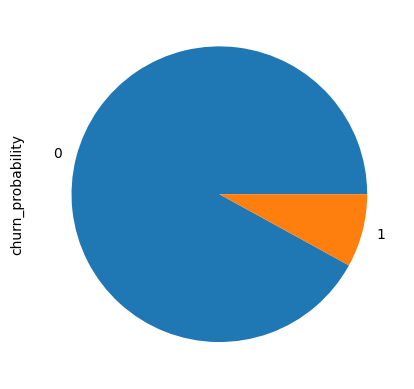

In [0]:
# Attributes to derive the churn variable
churn_features=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']

print((churn_train_filtered['churn_probability'].value_counts()/len(churn_train_filtered))*100)
((churn_train_filtered['churn_probability'].value_counts()/len(churn_train_filtered))*100).plot(kind="pie")
plt.show()

Only 8% of the data falls under Churned customers , the dataset is heavily skewed on non-churn customers , this would create bias in model output

The target variable is churn_probability, so the features related to target variables can be dropped , which is the features has suffix as 8

In [0]:
churn_cols_month_8 = [col for col in churn_train_filtered.columns if '_8' in col]
print(churn_cols_month_8)

churn_train_filtered.drop(churn_cols_month_8, axis=1, inplace=True)

churn_test.drop(churn_cols_month_8, axis=1, inplace=True)


['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8']


In [0]:
churn_train_filtered.shape

(14002, 100)

The columns used to derive the average amount can be dropped 



In [0]:
churn_train_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

churn_test.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)                   

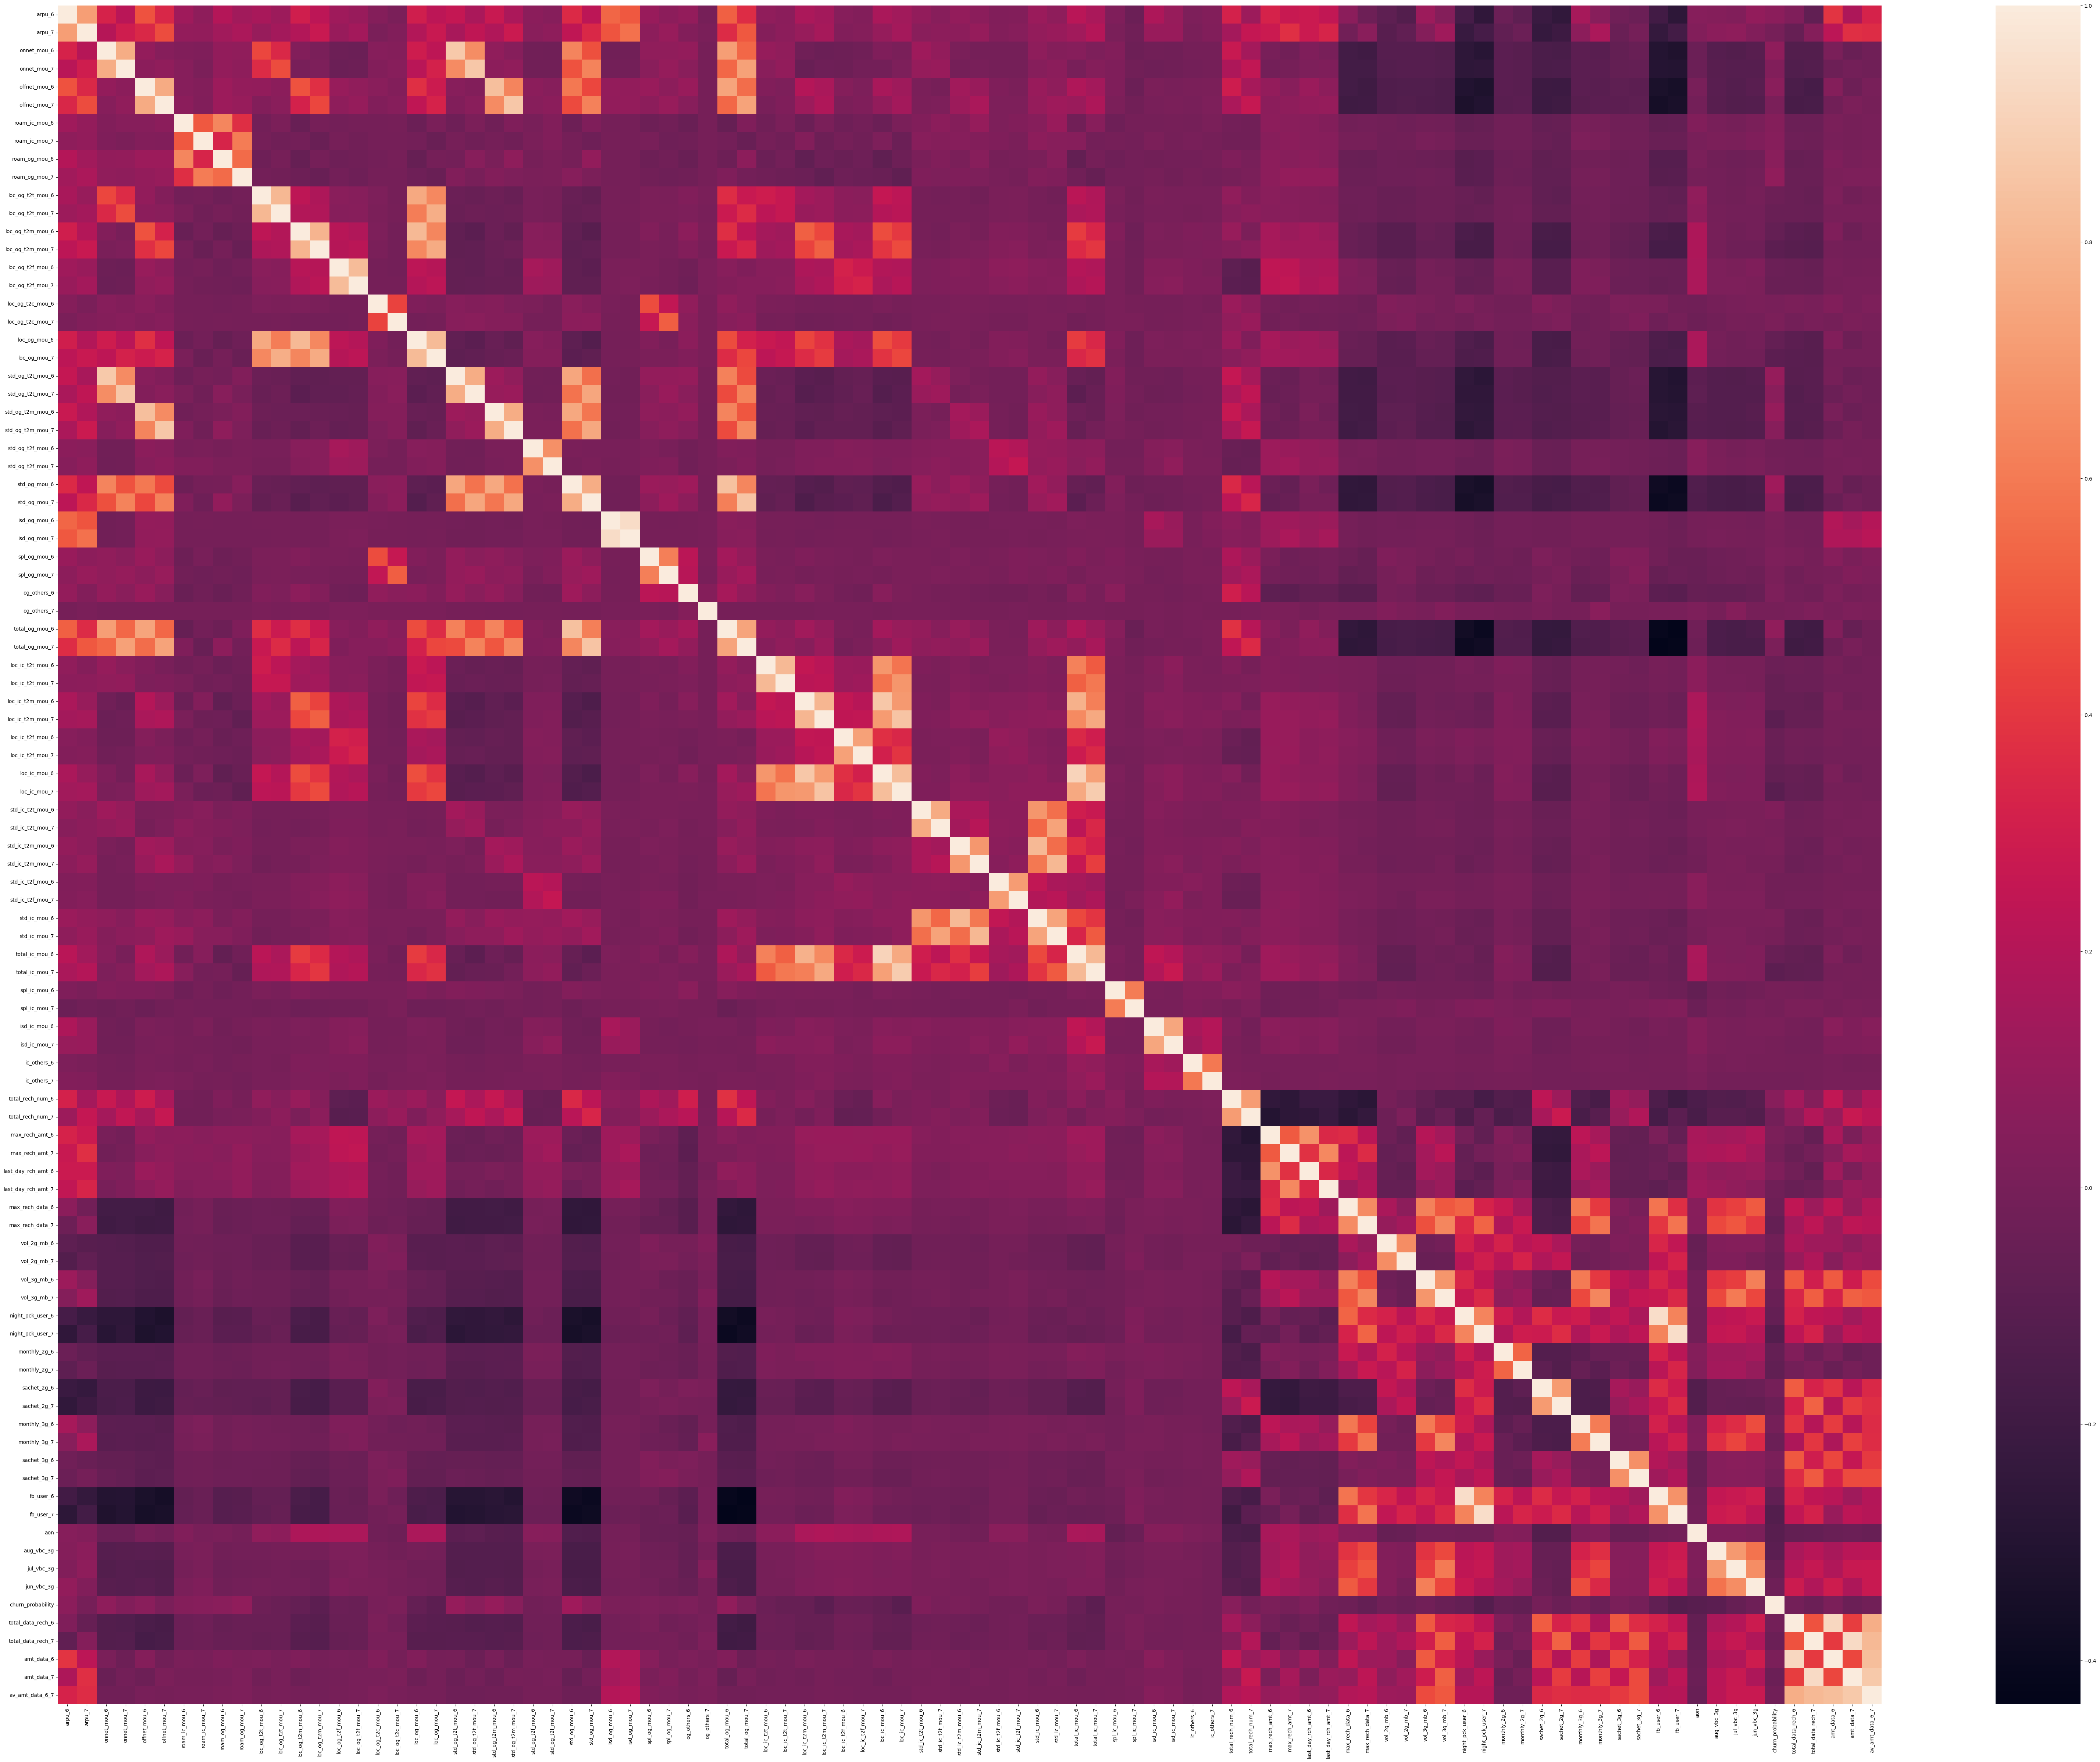

In [0]:
plt.figure(figsize = (80, 60))
sns.heatmap(churn_train_filtered.select_dtypes(include = ['int64','float64']).corr())
plt.show()

The heatmap is very hard to interpret because of the number of variables, so we can use the below table to understand the correlation

The below colour coding maynot be visible in some environments

In [0]:
churn_train_filtered.select_dtypes(include = ['int64','float64']).corr().style.background_gradient(cmap='Blues')


In [0]:

# Create correlation matrix
corr_matrix = churn_train_filtered.select_dtypes(include=['number']).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

set(to_drop)

{'amt_data_6',
 'amt_data_7',
 'av_amt_data_6_7',
 'fb_user_6',
 'fb_user_7',
 'isd_og_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_og_mou_6',
 'total_og_mou_7'}

In [0]:
churn_train_filtered.drop(set(to_drop),axis=1)
churn_test.drop(set(to_drop),axis=1)


In [0]:
print(churn_train_filtered.shape)
print(churn_test.shape)

(14002, 94)
(30000, 93)


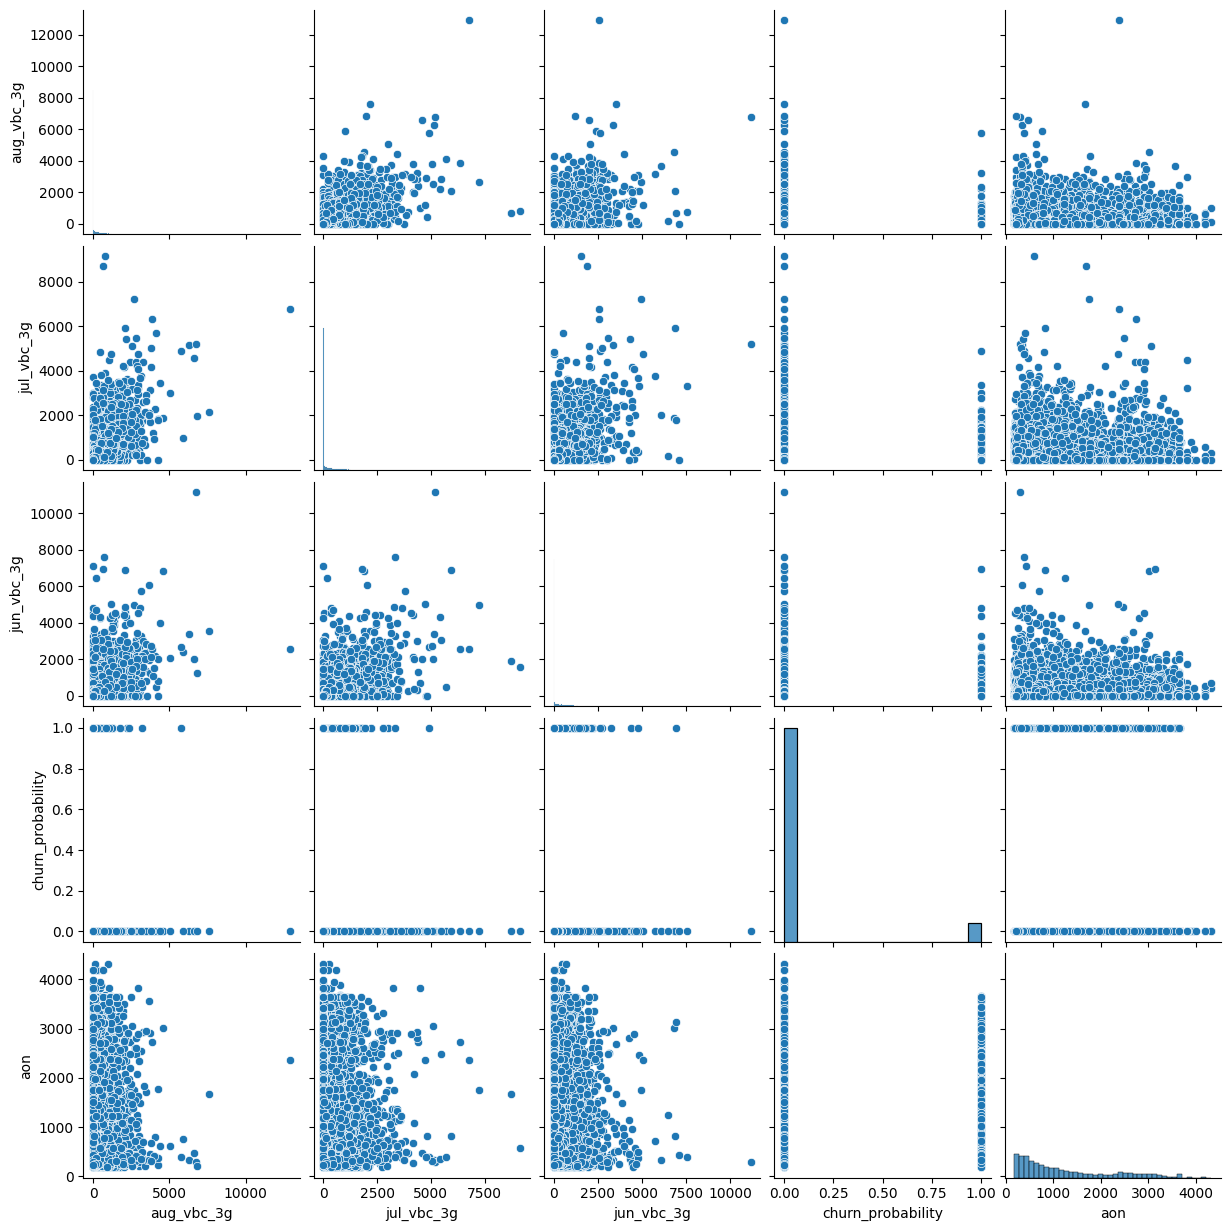

In [0]:
cols=['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','churn_probability','aon']
sns.pairplot(churn_train_filtered[cols])
plt.show()

We can observed skewness in churn vs non-churn across all the above variables 

In [0]:
train_cols=churn_train_filtered.columns.to_list()
test_cols=churn_test.columns.to_list()
train_cols.remove('churn_probability')

In [0]:
churn_test_filtered=churn_test[train_cols]
churn_test_filtered.head(2)

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,max_rech_data_6,max_rech_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,91.882,65.330,31.78,20.23,60.16,32.16,0.0,0.0,0.0,0.0,24.88,20.23,18.13,10.89,0.00,13.58,0.0,0.0,43.01,44.71,6.9,0.0,42.03,7.68,0.0,0.0,48.93,7.68,0.0,0.0,0.0,0.0,0.0,0.0,91.94,52.39,30.33,37.56,10.21,4.59,0.26,0.0,40.81,42.16,0.0,0.0,0.36,1.04,0.0,0.0,0.36,1.04,41.73,43.56,0.54,0.34,0.00,0.00,0.0,0.0,5,5,50,30,30,30,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0,0,0,0,0,0,0,0,-1.0,-1.0,1692,0.0,0.0,0.0,0.0,0.0,103.0,90.0,96.5
70000,414.168,515.568,75.51,41.21,474.34,621.84,0.0,0.0,0.0,0.0,75.51,41.21,473.61,598.08,0.73,0.00,0.0,0.0,549.86,639.29,0.0,0.0,0.00,23.76,0.0,0.0,0.00,23.76,0.0,0.0,0.0,0.0,0.0,0.0,549.86,663.06,19.99,26.95,160.19,122.29,1.49,0.0,181.69,149.24,0.0,0.0,0.00,12.51,0.0,0.0,0.00,12.51,296.33,339.64,0.00,0.00,114.63,177.88,0.0,0.0,5,4,250,250,250,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0,0,0,0,0,0,0,0,-1.0,-1.0,2533,0.0,0.0,0.0,0.0,0.0,500.0,500.0,500.0


In [0]:
print(churn_train_filtered.shape)
print(churn_test_filtered.shape)

(14002, 94)
(30000, 93)


#Building Models


In [0]:
X = churn_train_filtered.drop("churn_probability", axis = 1)
y = churn_train_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10501, 93)
(10501,)
(3501, 93)
(3501,)


The data is scattereted in different scale among the columns, so scaling has to be performed. All the pre-processsing is performed to the test dataset in parallel 

In [0]:
from sklearn import preprocessing
scaler = MinMaxScaler()
numerical_features=X_train.select_dtypes(include = ['int64','float64']).columns.tolist()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
churn_test_filtered[numerical_features] = scaler.transform(churn_test_filtered[numerical_features])

In [0]:
X_train.head(10)

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,max_rech_data_6,max_rech_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
10389,0.088204,0.046005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.003341,0.005248,0.000000,0.004691,0.000000,0.000000,0.002578,0.009051,0.000000,0.000000,0.000243,0.023894,0.000000,0.000000,0.000243,0.016567,0.006015,0.055321,0.000000,0.0,0.003146,0.063434,0.020677,0.000000,0.011765,0.014493,0.113466,0.137921,0.000000,0.146774,0.292605,0.292605,0.000021,0.000531,0.063002,0.059960,0.5,0.5,0.0,0.00,0.000000,0.000000,0.111111,0.071429,0.000000,0.000000,1.0,1.0,0.009177,0.018229,0.013755,0.021317,0.008228,0.008261,0.015726,0.016228,0.006845
8739,0.094287,0.050820,0.001396,0.009845,0.006975,0.014822,0.000000,0.000000,0.000000,0.000000,0.000188,0.010231,0.009853,0.018901,0.018961,0.033336,0.000000,0.000000,0.005563,0.024725,0.001228,0.001714,0.000040,0.000658,0.0,0.000000,0.001057,0.002219,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.006383,0.021659,0.000173,0.000310,0.026308,0.031179,0.009147,0.004897,0.025629,0.032752,0.001421,0.001124,0.002972,0.006380,0.001192,0.000000,0.004441,0.005426,0.028991,0.036273,0.000000,0.0,0.000000,0.000000,0.002160,0.003716,0.035294,0.028986,0.137157,0.227342,0.037406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.222893,0.005512,0.006040,0.012372,0.000000,0.000000,0.012097,0.013375,0.001860
6942,0.090658,0.040341,0.043661,0.000114,0.038298,0.000865,0.000000,0.000000,0.000000,0.000000,0.005409,0.000143,0.056366,0.000236,0.000000,0.000000,0.000000,0.000000,0.028143,0.000271,0.038827,0.000000,0.004978,0.000000,0.0,0.000000,0.037082,0.000000,0.000000,0.000000,0.013790,0.003855,0.00000,0.0,0.058683,0.000813,0.015496,0.004047,0.043943,0.006079,0.000000,0.000000,0.050415,0.009361,0.004594,0.005615,0.014909,0.000458,0.000000,0.000000,0.018207,0.005312,0.063459,0.013577,0.010628,0.0,0.000000,0.000000,0.000545,0.000000,0.105882,0.036232,0.027431,0.046075,0.027431,0.003226,0.029582,0.097749,0.002960,0.000718,0.001381,0.000901,0.5,0.5,0.0,0.00,0.023810,0.020833,0.000000,0.000000,0.000000,0.030303,1.0,1.0,0.211543,0.000000,0.000000,0.005784,0.000832,0.011038,0.010006,0.014623,0.001172
2805,0.094014,0.053966,0.038654,0.013621,0.077222,0.151958,0.009888,0.010497,0.011737,0.061861,0.004329,0.004777,0.031253,0.055622,0.000000,0.000000,0.000000,0.000000,0.016408,0.035154,0.030860,0.003224,0.057988,0.114624,0.0,0.002061,0.082748,0.095027,0.000000,0.000000,0.000000,0.0

**SMOTE**
One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.



In [0]:
sm = SMOTE(random_state=100)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [0]:
print(X_train_sm.shape)
print(y_train_sm.shape)

(19322, 93)
(19322,)


Lets Start building the models, Logistic Regression is built as a first baseline model

In [0]:
# Logistic regression model
lr1 = stats.GLM(y_train_sm,(stats.add_constant(X_train_sm)), family = stats.families.Binomial())
lr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                19322
Model:                            GLM   Df Residuals:                    19229
Model Family:                Binomial   Df Model:                           92
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10262.
Date:                Wed, 06 Mar 2024   Deviance:                       20525.
Time:                        07:38:32   Pearson chi2:                 1.56e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2768
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7086      0.533     -1.331      0.183      -1.752       0.335
arpu_6                11.1075      4.983      2.229      0.026       1.340      20.875
arpu_7                20.6619      5.967      3.463      0.001       8.967      32.357
onnet_mou_6          -84.5252     19.346     -4.369      0.000    -122.443     -46.607
onnet_mou_7           -6.3482     19.061     -0.333      0.739     -43.708      31.012
offnet_mou_6         -95.8465     22.673     -4.227      0.000    -140.285     -51.408
offnet_mou_7          -8.9109     14.895     -0.598      0.550     -38.105      20.284
roam_ic_mou_6          0.2635      0.892      0.295      0.768      -1.484       2.011
roam_ic_mou_7         -0.5457      1.095     -0.498      0.618      -2.692       1.600
roam_og_mou_6         44.9888     10.311      4.363      0.000      24.780      65.198
roam_og_mou_7          4.5720      4.372      1.046      0.296      -3.997      13.141
loc_og_t2t_mou_6   -6.014e+04   2.16e+04     -2.787      0.005   -1.02e+05   -1.78e+04
loc_og_t2t_mou_7    8294.5550   2.12e+04      0.391      0.696   -3.33e+04    4.99e+04
loc_og_t2m_mou_6   -4.392e+04   1.58e+04     -2.787      0.005   -7.48e+04    -1.3e+04
loc_og_t2m_mou_7    4569.1040   1.17e+04      0.391      0.696   -1.83e+04    2.75e+04
loc_og_t2f_mou_6   -5776.3757   2072.456     -2.787      0.005   -9838.315   -1714.436
loc_og_t2f_mou_7    1057.9401   2715.247      0.390      0.697   -4263.847    6379.727
loc_og_t2c_mou_6      -3.8134      1.012     -3.769      0.000      -5.796      -1.831
loc_og_t2c_mou_7       1.4086      1.388      1.014      0.310      -1.313       4.130
loc_og_mou_6       -1.208e+04   4.05e+04     -0.298      0.766   -9.15e+04    6.73e+04
loc_og_mou_7       -4.278e+04   2.57e+04     -1.665      0.096   -9.31e+04    7570.172
std_og_t2t_mou_6   -1.509e+05   2.88e+04     -5.249      0.000   -2.07e+05   -9.46e+04
std_og_t2t_mou_7   -1.839e+05   3.37e+04     -5.463      0.000    -2.5e+05   -1.18e+05
std_og_t2m_mou_6   -1.796e+05   3.42e+04     -5.249      0.000   -2.47e+05   -1.13e+05
std_og_t2m_mou_7   -1.491e+05   2.73e+04     -5.463      0.000   -2.03e+05   -9.56e+04
std_og_t2f_mou_6   -1.358e+04   2587.213     -5.250      0.000   -1.87e+04   -8513.169
std_og_t2f_mou_7   -1.074e+04   1964.970     -5.464      0.000   -1.46e+04   -6884.489
std_og_mou_6        9.374e+04   3.76e+04      2.494      0.013    2.01e+04    1.67e+05
std_og_mou_7         1.43e+05   3.85e+04      3.716      0.000    6.76e+04    2.18e+05
isd_og_mou_6       -3.387e+04   7895.449     -4.290      0.000   -4.93e+04   -1.84e+04
isd_og_mou_7       -2.072e+04   1.08e+04     -1.913      0.056    -4.2e+04     511.800
spl_og_mou_6       -1.073e+04   2501.817     -4.288      0.000   -1.56e+04   -5824.507
spl_og_mou_7       -6782.3785   3545.4

The base model have too many number of variables , its not feasible to maintain this many number of variables which can introduce variance in model behaviour , lets apply RFE to condense the number of variables

In [0]:
lr = LogisticRegression()

# RFE with 25 variables as output
rfe = RFE(lr,  n_features_to_select= 25)             
rfe = rfe.fit(X_train_sm, y_train_sm)



In [0]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("RFE selected columns: \n\n",rfe_columns)

RFE selected columns: 

 Index(['arpu_6', 'roam_og_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_mou_7', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'total_og_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'total_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7',
       'total_rech_num_7', 'last_day_rch_amt_6', 'monthly_2g_6',
       'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'aon', 'aug_vbc_3g',
       'jun_vbc_3g', 'total_data_rech_6'],
      dtype='object')


In [0]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))


[('arpu_6', True, 1),
 ('arpu_7', False, 58),
 ('onnet_mou_6', False, 45),
 ('onnet_mou_7', False, 15),
 ('offnet_mou_6', False, 14),
 ('offnet_mou_7', False, 64),
 ('roam_ic_mou_6', False, 54),
 ('roam_ic_mou_7', False, 39),
 ('roam_og_mou_6', False, 68),
 ('roam_og_mou_7', True, 1),
 ('loc_og_t2t_mou_6', False, 27),
 ('loc_og_t2t_mou_7', False, 13),
 ('loc_og_t2m_mou_6', False, 23),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2c_mou_6', False, 18),
 ('loc_og_t2c_mou_7', False, 41),
 ('loc_og_mou_6', False, 40),
 ('loc_og_mou_7', True, 1),
 ('std_og_t2t_mou_6', False, 22),
 ('std_og_t2t_mou_7', False, 37),
 ('std_og_t2m_mou_6', False, 34),
 ('std_og_t2m_mou_7', False, 44),
 ('std_og_t2f_mou_6', True, 1),
 ('std_og_t2f_mou_7', False, 2),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', False, 66),
 ('isd_og_mou_6', False, 9),
 ('isd_og_mou_7', False, 20),
 ('spl_og_mou_6', False, 28),
 ('spl_og_mou_7', False, 3),
 ('og_others_

Rebuilding the logistic regression with the features selected by RFE

In [0]:
X_train_SM = stats.add_constant(X_train_sm[rfe_columns])
lr2 = stats.GLM(y_train_sm,X_train_SM, family = stats.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                19322
Model:                            GLM   Df Residuals:                    19296
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10872.
Date:                Wed, 06 Mar 2024   Deviance:                       21744.
Time:                        07:44:15   Pearson chi2:                 2.30e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2297
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0111      0.133      7.593      0.000       0.750       1.272
arpu_6                 3.7952      1.496      2.538      0.011       0.864       6.726
roam_og_mou_7          2.2179      0.313      7.082      0.000       1.604       2.832
loc_og_t2m_mou_7      -2.2570      0.631     -3.577      0.000      -3.494      -1.020
loc_og_t2f_mou_6      -2.4148      1.236     -1.954      0.051      -4.837       0.008
loc_og_t2f_mou_7      -3.4449      1.678     -2.053      0.040      -6.734      -0.156
loc_og_mou_7          -3.4950      0.817     -4.278      0.000      -5.096      -1.894
std_og_t2f_mou_6      -5.8532      1.599     -3.661      0.000      -8.987      -2.719
std_og_mou_6           2.8924      0.340      8.517      0.000       2.227       3.558
total_og_mou_7        -1.8301      0.307     -5.970      0.000      -2.431      -1.229
loc_ic_t2m_mou_6       3.7184      0.635      5.859      0.000       2.474       4.962
loc_ic_mou_7          -0.9453      0.933     -1.014      0.311      -2.773       0.883
std_ic_t2t_mou_6       3.6974      0.690      5.362      0.000       2.346       5.049
total_ic_mou_7        -5.0972      0.756     -6.746      0.000      -6.578      -3.616
isd_ic_mou_7           4.2340      0.852      4.970      0.000       2.564       5.904
ic_others_7           -9.7373      2.520     -3.864      0.000     -14.677      -4.798
total_rech_num_7      -2.3018      0.315     -7.314      0.000      -2.919      -1.685
last_day_rch_amt_6     3.0393      0.516      5.894      0.000       2.029       4.050
monthly_2g_6          -2.4103      0.211    -11.435      0.000      -2.823      -1.997
monthly_2g_7          -1.6678      0.207     -8.057      0.000      -2.074      -1.262
sachet_2g_7           -3.2318      0.333     -9.704      0.000      -3.885      -2.579
monthly_3g_7          -3.3987      0.464     -7.320      0.000      -4.309      -2.489
aon                   -2.2374      0.092    -24.204      0.000      -2.419      -2.056
aug_vbc_3g           -16.2963      0.724    -22.510      0.000     -17.715     -14.877
jun_vbc_3g             7.1237      0.676     10.535      0.000       5.798       8.449
total_data_rech_6     -4.3356      0.952     -4.552      0.000      -6.202      -2.469
======================================================================================
"""

In [0]:
## Predicting values on train set.
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]


array([0.6997954 , 0.60831862, 0.74244016, 0.64411156, 0.18968653,
       0.3520937 , 0.67872873, 0.58633548, 0.14167768, 0.08705291])

In [0]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.699795
1,0,0.608319
2,0,0.742440
3,0,0.644112
4,0,0.189687


In [0]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

#  prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.699795,1
1,0,0.608319,1
2,0,0.742440,1
3,0,0.644112,1
4,0,0.189687,0


In [0]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[6345 3316]
 [2026 7635]]


In [0]:
# Model overall accuracy
print("Model overall accuracy:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

Model overall accuracy: 0.7235275851361143


Key Metrics for Classification

In [0]:
def metrics_classification(TP,TN,FP,FN):
  # Let's see the sensitivity of our logistic regression model
  print("Sensitivity = ",TP / float(TP+FN))

  # Let us calculate specificity
  print("Specificity = ",TN / float(TN+FP))

  # Calculate false postive rate - predicting churn when customer does not have churned
  print("False Positive Rate = ",FP/ float(TN+FP))

  # positive predictive value 
  print ("Precision = ",TP / float(TP+FP))

  # Negative predictive value
  print ("True Negative Prediction Rate = ",TN / float(TN+ FN))


 #ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

def predict_cutoff(y_train_sm_pred_final):
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    return cutoff_df 

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))    

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

metrics_classification(TP,TN,FP,FN)

Sensitivity =  0.7902908601594038
Specificity =  0.6567643101128248
False Positive Rate =  0.34323568988717523
Precision =  0.6971966030499498
True Negative Prediction Rate =  0.7579739577111456


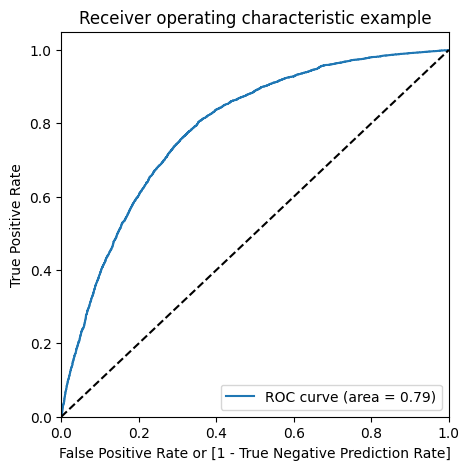

In [0]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)



In [0]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.699795,1,1,1,1,1,1,1,1,0,0,0
1,0,0.608319,1,1,1,1,1,1,1,1,0,0,0
2,0,0.742440,1,1,1,1,1,1,1,1,1,0,0
3,0,0.644112,1,1,1,1,1,1,1,1,0,0,0
4,0,0.189687,0,1,1,0,0,0,0,0,0,0,0


In [0]:
cutoff=predict_cutoff(y_train_sm_pred_final)
cutoff

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.565832,0.987165,0.144498
0.2,0.2,0.623124,0.965635,0.280613
0.3,0.3,0.665200,0.927440,0.402960
0.4,0.4,0.700652,0.874754,0.526550
0.5,0.5,0.723528,0.790291,0.656764
0.6,0.6,0.706242,0.626229,0.786254
0.7,0.7,0.640410,0.375738,0.905082
0.8,0.8,0.550098,0.123590,0.976607
0.9,0.9,0.511593,0.027326,0.995860


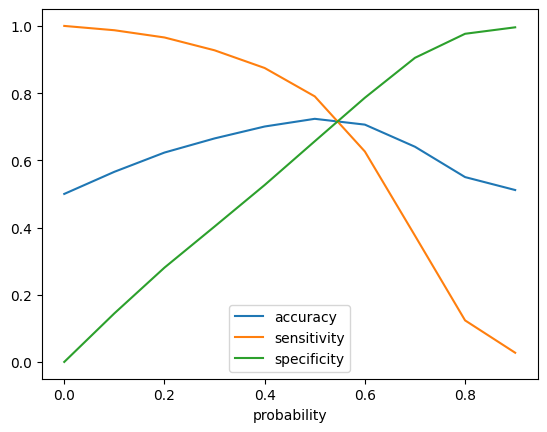

In [0]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

The initial cut off assigned was 0.5 , we can see the converging point of all the curves are slightly lesser then 0.6. We can introduce new cut-off by repeating the above execrise with finer granular cut off values . Lets assign 0.54 as new cut-off

In [0]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

print("Model overall accuracy:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

Model overall accuracy: 0.7223372321705828


Sensitivity =  0.7349135700238071
Specificity =  0.7097608943173584
False Positive Rate =  0.29023910568264155
Precision =  0.7168820678513732
True Negative Prediction Rate =  0.7280739010405606


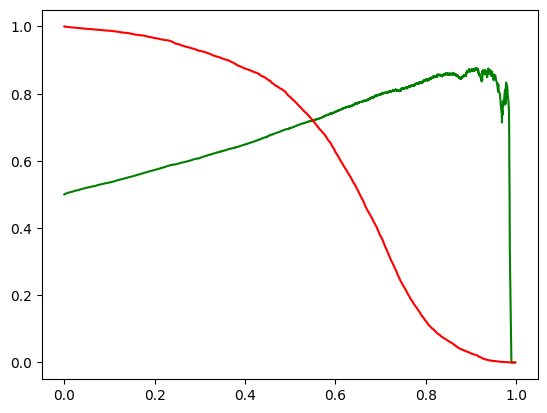

In [0]:
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
metrics_classification(TP,TN,FP,FN)

#Precision and recall tradeoff¶
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [0]:

# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(r, p)
print(auc_precision_recall)

0.7548079117956058


Lets validate the model against X_test

In [0]:
X_test_rfe=X_test[rfe_columns]
X_test_rfe.head()

,arpu_6,roam_og_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_mou_7,std_og_t2f_mou_6,std_og_mou_6,total_og_mou_7,loc_ic_t2m_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,total_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,last_day_rch_amt_6,monthly_2g_6,monthly_2g_7,sachet_2g_7,monthly_3g_7,aon,aug_vbc_3g,jun_vbc_3g,total_data_rech_6
5076,0.088953,0.000000,0.034596,0.000000,0.001325,0.021142,0.000000,0.000000,0.016639,0.159497,0.124148,0.000000,0.118017,0.000000,0.000782,0.072464,0.038404,0.25,0.0,0.041667,0.000000,0.207438,0.000000,0.0,0.039641
3904,0.080276,0.000000,0.045838,0.008809,0.021133,0.046424,0.000000,0.012206,0.303785,0.006922,0.036823,0.000019,0.083196,0.001241,0.082006,0.347826,0.016209,0.00,0.0,0.041667,0.000000,0.003622,0.000000,0.0,0.000000
1716,0.079319,0.000147,0.000236,0.000000,0.000000,0.000129,0.000000,0.000492,0.000102,0.000000,0.000312,0.000000,0.000295,0.000000,0.000000,0.021739,0.000000,0.25,0.5,0.000000,0.000000,0.068824,0.001255,0.0,0.002785
208,0.088945,0.000000,0.001299,0.000000,0.000000,0.000710,0.000000,0.000000,0.000580,0.001418,0.009068,0.000376,0.010058,0.000000,0.000473,0.036232,0.062843,0.00,0.0,0.000000,0.142857,0.011108,0.000000,0.0,0.030165
4528,0.094263,0.000000,0.031385,0.001182,0.000135,0.025166,0.074742,0.007756,0.026055,0.024016,0.025817,0.001279,0.026377,0.000000,0.000000,0.043478,0.049377,0.25,0.0,0.020833,0.000000,0.802705,0.007979,0.0,0.003581


In [0]:
# Adding constant to the test model.
X_test_SM = stats.add_constant(X_test_rfe)
y_test_pred = res.predict(X_test_SM)
print("\n Top ten p value of the prediction:\n",y_test_pred[:10])


 Top ten p value of the prediction:
 5076     0.402501
3904     0.156417
1716     0.410443
208      0.679359
4528     0.132128
10287    0.367671
8918     0.527540
205      0.497501
4573     0.356228
10516    0.056967
dtype: float64


In [0]:
y_pred = pd.DataFrame(y_test_pred)
y_pred=y_pred.rename(columns = {0:"Conv_prob"})
y_test_df = pd.DataFrame(y_test)
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
5076,0,0.402501,0
3904,0,0.156417,0
1716,0,0.410443,0
208,0,0.679359,1
4528,0,0.132128,0


Model Evaluation 

In [0]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.7115109968580405

In [0]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

metrics_classification(TP,TN,FP,FN)

print("predicted model accuracy: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("predicted model sensitivity: ",round(TP / float(TP+FN),2)*100,"%")

Confusion Matrix
 [[2301  920]
 [  90  190]]
Sensitivity =  0.6785714285714286
Specificity =  0.7143744178826451
False Positive Rate =  0.28562558211735484
Precision =  0.17117117117117117
True Negative Prediction Rate =  0.9623588456712673
predicted model accuracy:  71.0 %
predicted model sensitivity:  68.0 %


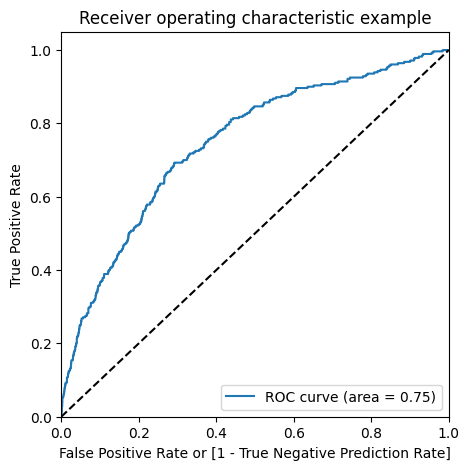

In [0]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

The baseline model performance is not at par but its a good start without PCA, lets perform PCA and use the features for logistic regression to check whether the model performance is better than the current Logistic regressionmodel

#Logistic Regression with PCA

In [0]:
X_train.shape

(10501, 93)

In [0]:
X_train.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,max_rech_data_6,max_rech_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
10389,0.088204,0.046005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.003341,0.005248,0.000000,0.004691,0.000000,0.000000,0.002578,0.009051,0.000000,0.000000,0.000243,0.023894,0.000000,0.000000,0.000243,0.016567,0.006015,0.055321,0.000000,0.0,0.003146,0.063434,0.020677,0.000000,0.011765,0.014493,0.113466,0.137921,0.000000,0.146774,0.292605,0.292605,0.000021,0.000531,0.063002,0.059960,0.5,0.5,0.0,0.0,0.00000,0.000000,0.111111,0.071429,0.0,0.000000,1.0,1.0,0.009177,0.018229,0.013755,0.021317,0.008228,0.008261,0.015726,0.016228,0.006845
8739,0.094287,0.050820,0.001396,0.009845,0.006975,0.014822,0.000000,0.000000,0.000000,0.000000,0.000188,0.010231,0.009853,0.018901,0.018961,0.033336,0.000000,0.000000,0.005563,0.024725,0.001228,0.001714,0.000040,0.000658,0.0,0.000000,0.001057,0.002219,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.006383,0.021659,0.000173,0.000310,0.026308,0.031179,0.009147,0.004897,0.025629,0.032752,0.001421,0.001124,0.002972,0.006380,0.001192,0.000000,0.004441,0.005426,0.028991,0.036273,0.000000,0.0,0.000000,0.000000,0.002160,0.003716,0.035294,0.028986,0.137157,0.227342,0.037406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.222893,0.005512,0.006040,0.012372,0.000000,0.000000,0.012097,0.013375,0.001860
6942,0.090658,0.040341,0.043661,0.000114,0.038298,0.000865,0.000000,0.000000,0.000000,0.000000,0.005409,0.000143,0.056366,0.000236,0.000000,0.000000,0.000000,0.000000,0.028143,0.000271,0.038827,0.000000,0.004978,0.000000,0.0,0.000000,0.037082,0.000000,0.000000,0.000000,0.013790,0.003855,0.0,0.0,0.058683,0.000813,0.015496,0.004047,0.043943,0.006079,0.000000,0.000000,0.050415,0.009361,0.004594,0.005615,0.014909,0.000458,0.000000,0.000000,0.018207,0.005312,0.063459,0.013577,0.010628,0.0,0.000000,0.000000,0.000545,0.000000,0.105882,0.036232,0.027431,0.046075,0.027431,0.003226,0.029582,0.097749,0.002960,0.000718,0.001381,0.000901,0.5,0.5,0.0,0.0,0.02381,0.020833,0.000000,0.000000,0.0,0.030303,1.0,1.0,0.211543,0.000000,0.000000,0.005784,0.000832,0.011038,0.010006,0.014623,0.001172
2805,0.094014,0.053966,0.038654,0.013621,0.077222,0.151958,0.009888,0.010497,0.011737,0.061861,0.004329,0.004777,0.031253,0.055622,0.000000,0.000000,0.000000,0.000000,0.016408,0.035154,0.030860,0.003224,0.057988,0.114624,0.0,0.002061,0.082748,0.095027,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.081737,0.121864,0

In [0]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)
pca.components_

array([[ 6.84763892e-03,  5.46307126e-03,  3.85431085e-02, ...,
        -7.74212956e-03, -9.74312614e-03, -1.33986211e-02],
       [ 5.80460352e-03, -4.16670312e-03,  6.81428929e-03, ...,
         1.28318970e-02, -1.42192815e-02, -7.38626099e-04],
       [ 6.52782038e-03,  4.56629277e-03, -2.84709403e-02, ...,
        -7.02311349e-03, -8.68340916e-03, -1.20372664e-02],
       ...,
       [ 8.20656012e-07, -1.22728699e-06, -8.76208768e-07, ...,
        -8.53317322e-07,  1.59582334e-06,  5.40441978e-07],
       [ 7.05532060e-07,  1.14419969e-06,  6.66782788e-07, ...,
        -1.29808608e-06,  1.50471685e-07, -8.98464415e-07],
       [-0.00000000e+00, -3.00838946e-15,  1.38618231e-16, ...,
        -5.28232011e-01, -5.11882798e-01,  6.77456230e-01]])

Looking at the explained variance ratio for each component

In [0]:
pca.explained_variance_ratio_

array([5.64462130e-01, 1.07708645e-01, 6.68190197e-02, 3.74934579e-02,
       3.12323855e-02, 2.41240761e-02, 2.00135592e-02, 1.65421162e-02,
       1.17372208e-02, 9.84100363e-03, 8.62702447e-03, 7.47978534e-03,
       7.20978158e-03, 6.48349767e-03, 5.74314211e-03, 5.42140775e-03,
       5.15101754e-03, 4.70255738e-03, 4.09659121e-03, 3.60993702e-03,
       2.98991895e-03, 2.92570231e-03, 2.78123049e-03, 2.70535229e-03,
       2.61868953e-03, 2.42829326e-03, 2.27191704e-03, 2.19233904e-03,
       2.12183868e-03, 1.98507102e-03, 1.87386228e-03, 1.49198358e-03,
       1.39358801e-03, 1.35670261e-03, 1.26811996e-03, 1.25711232e-03,
       1.19115785e-03, 1.12192759e-03, 1.05317147e-03, 1.04111565e-03,
       9.25054394e-04, 8.98318377e-04, 8.67455381e-04, 8.07302839e-04,
       7.79026116e-04, 7.43829092e-04, 6.95074569e-04, 6.25372528e-04,
       5.96051096e-04, 5.75668117e-04, 5.42350558e-04, 5.18429936e-04,
       4.68643609e-04, 4.50192751e-04, 3.91327296e-04, 3.58093685e-04,
      

Making a scree plot for the explained variance

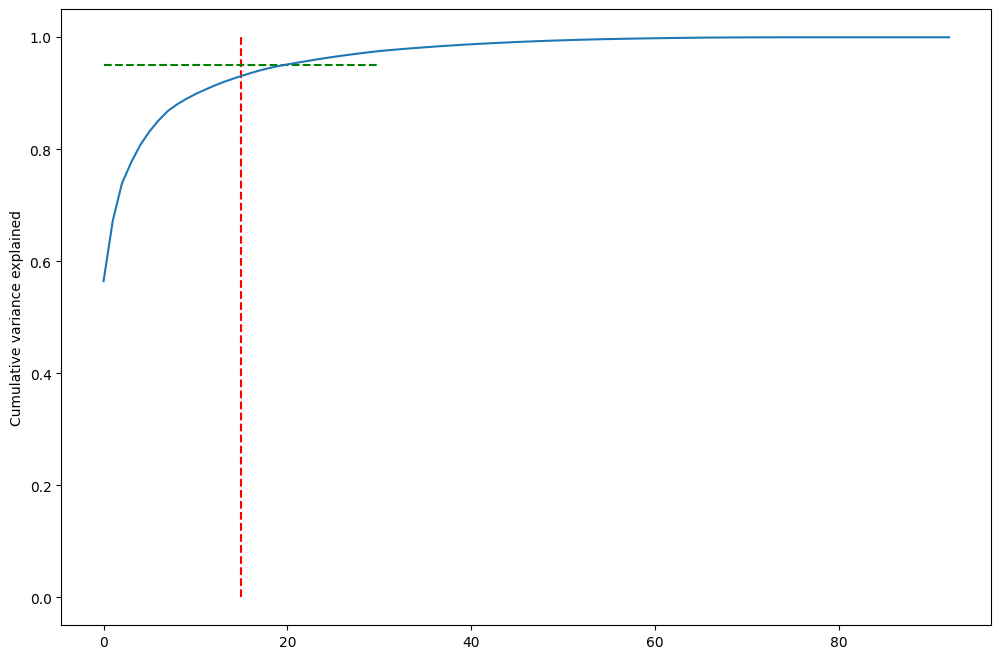

In [0]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Lets Perform PCA with 16 components & use IncrementalPCA this time

In [0]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train)
print(df_train_pca.shape)
corrmat = np.corrcoef(df_train_pca.transpose())
print(corrmat.shape)


(10501, 16)
(16, 16)


Plotting the heatmap of the corr matrix

<AxesSubplot:>

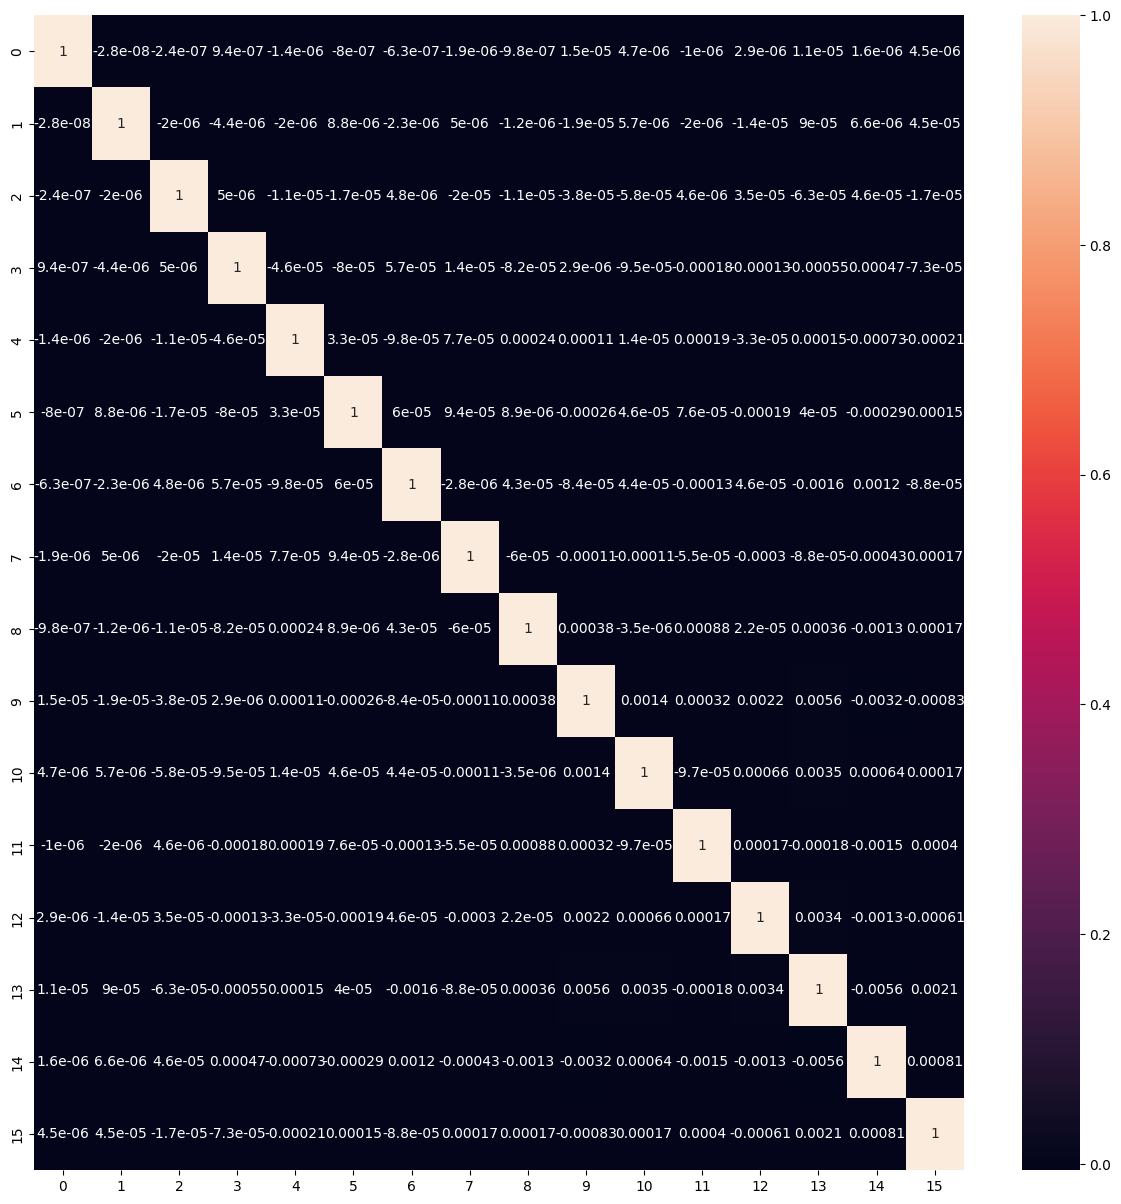

In [0]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [0]:
X_test.shape

(3501, 93)

In [0]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(3501, 16)

### Applying logistic regression on the data on our Principal components

In [0]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)
pred_probs_test = model_pca.predict_proba(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.72'

Model Evaluation 


Evaluation on Train Set

In [0]:
pred_probs_train = model_pca.predict(df_train_pca)
confusion = metrics.confusion_matrix(y_train, pred_probs_train)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
metrics_classification(TP,TN,FP,FN)
print("Accuracy:",metrics.accuracy_score(y_train, pred_probs_train))


Sensitivity =  0.013095238095238096
Specificity =  0.9993789462788532
False Positive Rate =  0.0006210537211468792
Precision =  0.6470588235294118
True Negative Prediction Rate =  0.920927127050744
Accuracy: 0.9204837634511


Evaluation on Test Set

In [0]:
pred_probs_test1 = model_pca.predict(df_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
metrics_classification(TP,TN,FP,FN)

Sensitivity =  0.010714285714285714
Specificity =  0.999689537410742
False Positive Rate =  0.0003104625892579944
Precision =  0.75
True Negative Prediction Rate =  0.9207892479267944


In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_probs_test1))


Accuracy: 0.9205941159668666


#Its Evident with PCA Logistic Regression Accuracy is improved till 92% & there is no variance between train and test accuracy scores

Making it a little more unsupervised


In [0]:
pca_again = PCA(0.95)
df_train_pca2 = pca_again.fit_transform(X_train)
print(df_train_pca2.shape)
df_test_pca2 = pca_again.transform(X_test)
print(df_test_pca2.shape)

(10501, 21)
(3501, 21)


In [0]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.73'

In [0]:
pca_again.components_

array([[ 0.00684764,  0.00546307,  0.03854311, ..., -0.00774213,
        -0.00974313, -0.01339862],
       [ 0.0058046 , -0.0041667 ,  0.00681429, ...,  0.0128319 ,
        -0.01421928, -0.00073863],
       [ 0.00652782,  0.00456629, -0.02847094, ..., -0.00702311,
        -0.00868341, -0.01203727],
       ...,
       [-0.03084199, -0.05311193,  0.02357213, ...,  0.12750457,
         0.00545845,  0.10354334],
       [-0.01091713, -0.00257952,  0.03193124, ...,  0.090106  ,
         0.11536034,  0.15742397],
       [ 0.04974312,  0.00604186, -0.11463509, ...,  0.08730264,
        -0.14067643, -0.03822209]])

Evaluation on Train set


In [0]:
pred_probs_train2 = model_pca2.predict(df_train_pca2)
confusion = metrics.confusion_matrix(y_train, pred_probs_train2)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
metrics_classification(TP,TN,FP,FN)
print("Accuracy:",metrics.accuracy_score(y_train, pred_probs_train2))

Sensitivity =  0.009523809523809525
Specificity =  0.9993789462788532
False Positive Rate =  0.0006210537211468792
Precision =  0.5714285714285714
True Negative Prediction Rate =  0.9206636788404692
Accuracy: 0.9201980763736787


Evaluation on Test set


In [0]:
pred_probs_test2 = model_pca2.predict(df_test_pca2)
confusion = metrics.confusion_matrix(y_test, pred_probs_test2)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
metrics_classification(TP,TN,FP,FN)
print("Accuracy:",metrics.accuracy_score(y_test, pred_probs_test2))

Sensitivity =  0.014285714285714285
Specificity =  0.999689537410742
False Positive Rate =  0.0003104625892579944
Precision =  0.8
True Negative Prediction Rate =  0.9210526315789473
Accuracy: 0.9208797486432447


In [0]:
y_test.value_counts()

0    3221
1     280
Name: churn_probability, dtype: int64

#SVM

In [0]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Model Evaluation Metrics


In [0]:
confusion_matrix(y_true=y_test, y_pred=y_pred)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9200228506141103
precision 0.0
recall 0.0


#Hyperparameter Tuning
Now, we have multiple hyperparameters to optimise -

The choice of kernel (linear, rbf etc.)
C
gamma
We'll use the GridSearchCV() method to tune the hyperparameters.

#Grid Search to Find Optimal Hyperparameters
Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time).

In [0]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv_svm = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_svm.fit(X_train, y_train)    

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [0]:
# cv results
cv_results = pd.DataFrame(model_cv_svm.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.075379,0.023336,0.400366,0.010262,1,0.01,"{'C': 1, 'gamma': 0.01}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509
1,0.905765,0.013207,0.341624,0.005905,1,0.001,"{'C': 1, 'gamma': 0.001}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509
2,0.881923,0.016444,0.332304,0.004975,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509
3,1.645831,0.021407,0.486038,0.012036,10,0.01,"{'C': 10, 'gamma': 0.01}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509
4,1.185231,0.019771,0.427643,0.010749,10,0.001,"{'C': 10, 'gamma': 0.001}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509
5,0.891519,0.017994,0.341700,0.011142,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509
6,4.964704,0.257088,0.508155,0.023318,100,0.01,"{'C': 100, 'gamma': 0.01}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509
7,1.914760,0.044535,0.577726,0.012516,100,0.001,"{'C': 100, 'gamma': 0.001}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509
8,1.090871,0.033653,0.401878,0.009708,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509
9,10.476169,1.785267,0.432558,0.013832,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.924798,0.914762,0.915238,0.929524,0.915714,0.920007,0.006037,1,0.91881,0.921319,0.9212,0.917629,0.921081,0.920008,0.001509


In [0]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv_svm.best_score_
best_hyperparams = model_cv_svm.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9200071621223452 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


Building and Evaluating the Final SVM Model


In [0]:

# model
model_svm = SVC(C=1, gamma=0.01, kernel="rbf")

model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred_svm), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred_svm))
print("precision", metrics.precision_score(y_test, y_pred_svm))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred_svm))

[[3221    0]
 [ 280    0]] 

accuracy 0.9200228506141103
precision 0.0
sensitivity/recall 0.0


#XGBoost Classifier with Hyper Parameter Tuning

Hyperopt is used since the other HPT techniques were throttling and not performing well

In [0]:
import xgboost as xgb
from hyperopt import STATUS_OK

train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

N_FOLDS = 5

# define objective to minimize
def objective(params, n_folds = N_FOLDS):
    params['objective'] = 'binary:logistic'
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=train_dmatrix, params=params,
                  nfold=n_folds, num_boost_round=10000, early_stopping_rounds=100, 
                  metrics="auc", as_pandas=True, seed=123)

    # Print the accuracy
    loss = 1 - cv_results["test-auc-mean"].iloc[-1]
    n_estimators = cv_results["test-auc-mean"].idxmax() + 1
    return {'loss': loss, 'params': params, 'n_estimators': n_estimators, 'status': STATUS_OK}

In [0]:
from hyperopt import hp
from hyperopt.pyll.stochastic import sample
from hyperopt import Trials

hyperparameter_space = {
    'n_jobs': -1,
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'min_child_weight': hp.quniform('min_child_weight', 1, 7, 2),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'max_depth': hp.randint('max_depth', 1,16),
    'gamma': hp.uniform('gamma', 0.1,0.4),
    'max_delta_step': hp.randint('max_delta_step',0,10),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2))
}


bayes_trials = Trials()

In [0]:
from hyperopt import fmin
from hyperopt import tpe

MAX_EVALS = 50

best = fmin(fn = objective, space = hyperparameter_space, algo = tpe.suggest, max_evals = MAX_EVALS,
           trials = bayes_trials, rstate = np.random.default_rng(seed=42))
best           

100%|██████████| 50/50 [29:11<00:00, 35.03s/trial, best loss: 0.20464564683448416]


{'colsample_bytree': 0.7068278153216424,
 'gamma': 0.3348404422381236,
 'learning_rate': 0.05048472915726258,
 'max_delta_step': 2,
 'max_depth': 2,
 'min_child_weight': 2.0,
 'reg_alpha': 0.9759998977389169,
 'reg_lambda': 0.7130445215144277,
 'subsample': 0.7789294379947928}

In [0]:
# best['num_boost_round']=10000
# best['early_stopping_rounds']=100

xgb_best = xgb.XGBClassifier(**best)

xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7068278153216424, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3348404422381236, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05048472915726258, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=2, max_leaves=None, min_child_weight=2.0, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

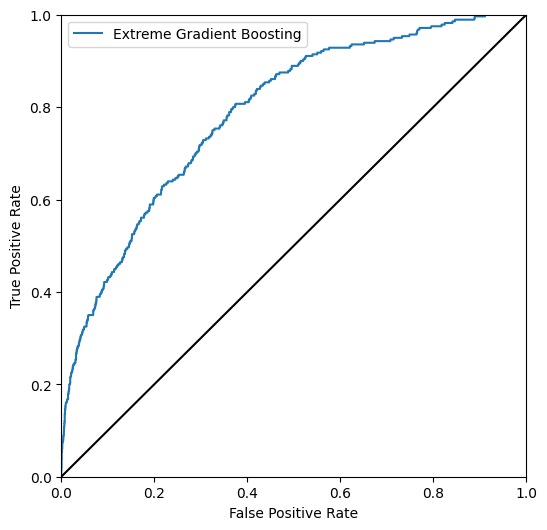

In [0]:
# Import roc_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def add_roc_plot(model, test_x, test_y, legend_text):
    y_pred_prob = model.predict_proba(test_x)[:, 1]
    # Calculate the roc metrics
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=legend_text)
    plt.legend()

    
models_list = [xgb_best]
model_names = ['Extreme Gradient Boosting']

plt.figure(figsize=(6, 6))
[add_roc_plot(model, X_test, y_test, legend_text) for model, legend_text in zip(models_list, model_names)]

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim((0,1))
plt.ylim((0,1))
plt.plot([0, 1], [0, 1], "k-")
plt.show()

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score

list_scores = [roc_auc_score, recall_score, precision_score, accuracy_score]
calc_scores = []
def compute_scores(model, x_test, y_test, scores):
    return [round(score(y_test, model.predict(x_test)), 2) for score in scores]
    
[calc_scores.append(compute_scores(model, X_test, y_test, list_scores)) for model in models_list] 

score_names = ['roc_auc', 'recall', 'precision', 'accuracy']
scores_df = pd.DataFrame(calc_scores, columns=score_names, index=model_names)

scores_df

,roc_auc,recall,precision,accuracy
Extreme Gradient Boosting,0.53,0.05,0.83,0.92


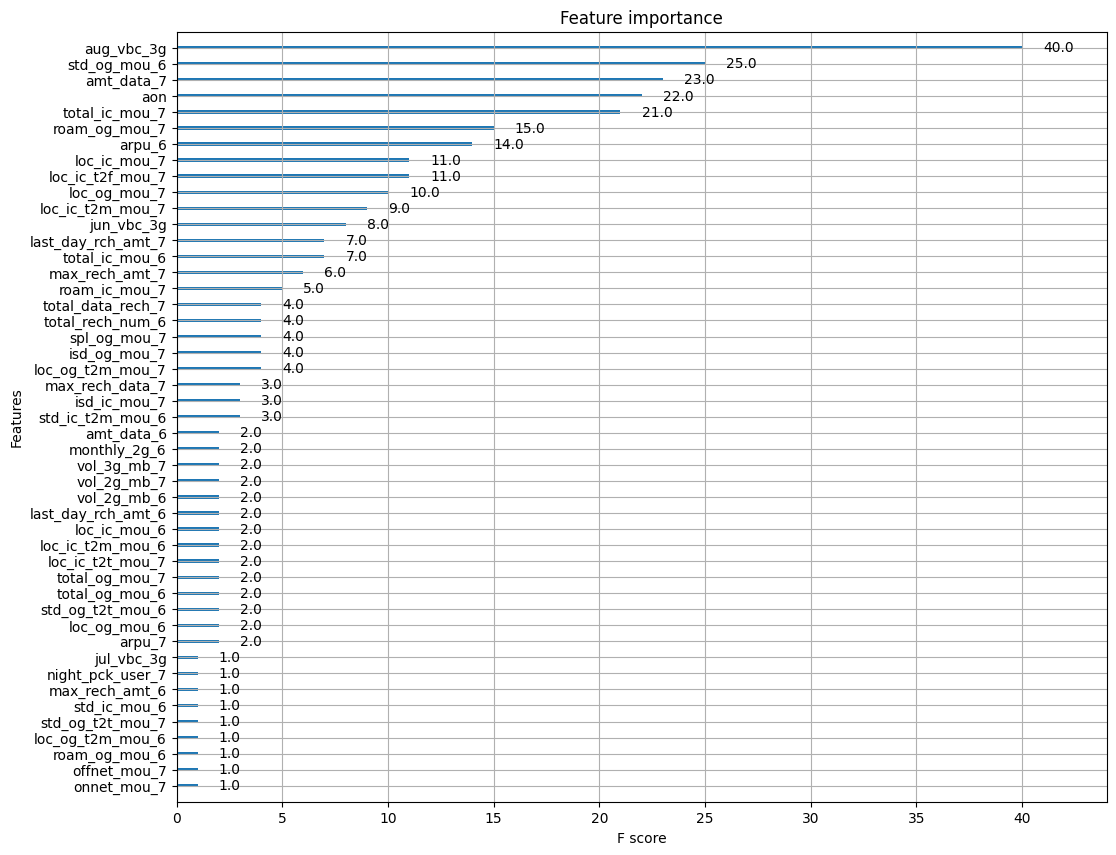

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(12,10))
xgb.plot_importance(xgb_best, ax = ax)
plt.show()

#Random forest with PCA


In [0]:
from sklearn.ensemble import RandomForestClassifier

max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

rf.fit(df_train_pca, y_train)

10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [0]:
rf.oob_score_

0.9201028473478716

#HPT 

In [0]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(df_train_pca, y_train)


Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [0]:
grid_search.best_score_                           

0.92000761614623

In [0]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [0]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)
rfc_model.fit(df_train_pca, y_train)
evaluate_model(rfc_model)                             

Train Accuracy : 0.9200076183220646
Train Confusion Matrix:
[[9661    0]
 [ 840    0]]
--------------------------------------------------
Test Accuracy : 0.9200228506141103
Test Confusion Matrix:
[[3221    0]
 [ 280    0]]


In [0]:
rfc_model.feature_importances_

array([0.08768947, 0.0999071 , 0.16087649, 0.16616147, 0.03381722,
       0.04749778, 0.02955051, 0.03144682, 0.02732175, 0.02000319,
       0.01679652, 0.1945229 , 0.02207995, 0.01577977, 0.03073029,
       0.01581878])

#The accuracy of XGBOOST and Logistic Regression with PCA is same on the Training dataset , we can apply both on the test.csv (unseen data) to see which one gives better performance & the same can be finalised as a best model

In [0]:
churn_test.head(2) # Test.CSV is loaded and all the pre-processing is applied in advance 

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,max_rech_data_6,max_rech_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,91.882,65.330,31.78,20.23,60.16,32.16,0.0,0.0,0.0,0.0,24.88,20.23,18.13,10.89,0.00,13.58,0.0,0.0,43.01,44.71,6.9,0.0,42.03,7.68,0.0,0.0,48.93,7.68,0.0,0.0,0.0,0.0,0.0,0.0,91.94,52.39,30.33,37.56,10.21,4.59,0.26,0.0,40.81,42.16,0.0,0.0,0.36,1.04,0.0,0.0,0.36,1.04,41.73,43.56,0.54,0.34,0.00,0.00,0.0,0.0,5,5,50,30,30,30,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0,0,0,0,0,0,0,0,-1.0,-1.0,1692,0.0,0.0,0.0,0.0,0.0,103.0,90.0,96.5
70000,414.168,515.568,75.51,41.21,474.34,621.84,0.0,0.0,0.0,0.0,75.51,41.21,473.61,598.08,0.73,0.00,0.0,0.0,549.86,639.29,0.0,0.0,0.00,23.76,0.0,0.0,0.00,23.76,0.0,0.0,0.0,0.0,0.0,0.0,549.86,663.06,19.99,26.95,160.19,122.29,1.49,0.0,181.69,149.24,0.0,0.0,0.00,12.51,0.0,0.0,0.00,12.51,296.33,339.64,0.00,0.00,114.63,177.88,0.0,0.0,5,4,250,250,250,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0,0,0,0,0,0,0,0,-1.0,-1.0,2533,0.0,0.0,0.0,0.0,0.0,500.0,500.0,500.0


In [0]:
churn_test.shape

(30000, 93)

In [0]:
churn_test_xgb=churn_test[X_train.columns.to_list()]

In [0]:
churn_test_xgb.shape

(30000, 93)

In [0]:
X_test.shape

(3501, 93)

In [0]:
xgboost_prediction=xgb_best.predict(churn_test_xgb)

In [0]:
xgboost_prediction[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [0]:
print(len(xgboost_prediction))
print(len(churn_test_id))

30000
30000


#Prediction file by XGB without PCA

In [0]:
final_prediction = pd.DataFrame({'id':churn_test_id,'churn_probability':xgboost_prediction})
final_prediction.to_csv('/Workspace/Users/pradeep.ravi@databricks.com/ml/telecom_churn/xgb_nopca.csv',index=False)
print(final_prediction)

          id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
5      70004                  0
6      70005                  0
7      70006                  0
8      70007                  0
9      70008                  0
10     70009                  0
11     70010                  0
12     70011                  0
13     70012                  0
14     70013                  0
15     70014                  0
16     70015                  0
17     70016                  0
18     70017                  0
19     70018                  0
20     70019                  1
21     70020                  0
22     70021                  0
23     70022                  0
24     70023                  0
25     70024                  0
26     70025                  0
27     70026                  0
28     70027                  0
29     70028                  0
30     7

In [0]:
df_unseen_pca = pca_final.transform(churn_test[X_train.columns.to_list()])

log_reg_pca_pred = model_pca.predict(df_unseen_pca)

#Prediction file by Logistic Regression with Incremental PCA

In [0]:
final_prediction = pd.DataFrame({'id':churn_test_id,'churn_probability':log_reg_pca_pred})
final_prediction.to_csv('/Workspace/Users/pradeep.ravi@databricks.com/ml/telecom_churn/lr_incre_pca.csv',index=False)
print(final_prediction)

          id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
5      70004                  0
6      70005                  0
7      70006                  0
8      70007                  0
9      70008                  0
10     70009                  0
11     70010                  0
12     70011                  0
13     70012                  0
14     70013                  0
15     70014                  0
16     70015                  0
17     70016                  0
18     70017                  0
19     70018                  0
20     70019                  0
21     70020                  1
22     70021                  0
23     70022                  0
24     70023                  0
25     70024                  0
26     70025                  0
27     70026                  0
28     70027                  0
29     70028                  0
30     7

#Prediction file by Random Forest with PCA

In [0]:
rf_pca_pred=rfc_model.predict(df_unseen_pca)
final_prediction = pd.DataFrame({'id':churn_test_id,'churn_probability':rf_pca_pred})
final_prediction.to_csv('/Workspace/Users/pradeep.ravi@databricks.com/ml/telecom_churn/rf_pca.csv',index=False)
print(final_prediction)

          id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
5      70004                  0
6      70005                  0
7      70006                  0
8      70007                  0
9      70008                  0
10     70009                  0
11     70010                  0
12     70011                  0
13     70012                  0
14     70013                  0
15     70014                  0
16     70015                  0
17     70016                  0
18     70017                  0
19     70018                  0
20     70019                  0
21     70020                  0
22     70021                  0
23     70022                  0
24     70023                  0
25     70024                  0
26     70025                  0
27     70026                  0
28     70027                  0
29     70028                  0
30     7

#Prediction file by Logistic Regression with PCA of 95% variance

In [0]:
df_unseen_pca = pca_again.transform(churn_test[X_train.columns.to_list()])

log_reg_pca_pred = model_pca2.predict(df_unseen_pca)

final_prediction = pd.DataFrame({'id':churn_test_id,'churn_probability':log_reg_pca_pred})
final_prediction.to_csv('/Workspace/Users/pradeep.ravi@databricks.com/ml/telecom_churn/lr_pca_variance.csv',index=False)
print(final_prediction)

          id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
5      70004                  0
6      70005                  0
7      70006                  0
8      70007                  0
9      70008                  0
10     70009                  0
11     70010                  0
12     70011                  0
13     70012                  0
14     70013                  0
15     70014                  0
16     70015                  0
17     70016                  0
18     70017                  0
19     70018                  0
20     70019                  0
21     70020                  1
22     70021                  0
23     70022                  0
24     70023                  0
25     70024                  0
26     70025                  0
27     70026                  0
28     70027                  0
29     70028                  0
30     7

#Prediction file by SVM 

In [0]:
svm_pred=model_svm.predict(churn_test[X_train.columns.to_list()])
final_prediction = pd.DataFrame({'id':churn_test_id,'churn_probability':svm_pred})
final_prediction.to_csv('/Workspace/Users/pradeep.ravi@databricks.com/ml/telecom_churn/svm.csv',index=False)
print(final_prediction)

          id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
5      70004                  0
6      70005                  0
7      70006                  0
8      70007                  0
9      70008                  0
10     70009                  0
11     70010                  0
12     70011                  0
13     70012                  0
14     70013                  0
15     70014                  0
16     70015                  0
17     70016                  0
18     70017                  0
19     70018                  0
20     70019                  0
21     70020                  0
22     70021                  0
23     70022                  0
24     70023                  0
25     70024                  0
26     70025                  0
27     70026                  0
28     70027                  0
29     70028                  0
30     7

#Conclusion and Observations

The different Models which are tried are 
- Logistic Regression with and without PCA
- XGBOOST 
- Random Forest with PCA
- SVM

- The logistic regression is considered as a baseline model with an accuracy of 72%
- All the other models yieled an accuracy of 92%
- The final two model chosen are XGBOOST and Random Forest 
- The top 10 features demonstrated in the feature importance chart of the  Random forest are the key variables which decides the churn

